### This project is to take anotomized data and pretict the target class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
kn_data = pd.read_csv("resources/KNN_Project_Data")

In [5]:
kn_data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### We will need to standardize the data for......

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scalar = StandardScaler()

In [10]:
scalar.fit(kn_data.drop("TARGET CLASS", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_features  = scalar.transform(kn_data.drop("TARGET CLASS", axis = 1))

In [13]:
features_Df = pd.DataFrame(scaled_features, columns=kn_data.columns[:-1])

In [15]:
features_Df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


### Lets begin to start training our model

In [16]:
X = features_Df
y = kn_data["TARGET CLASS"]

In [17]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [18]:
k_model = KNeighborsClassifier(n_neighbors=1)

In [19]:
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Predictions -> Looks like our model was 73 % accurate -> we will improve on this using the elbow method below

In [21]:
predictions = k_model.predict(X_test)

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [23]:
print(confusion_matrix(y_test, predictions))

[[109  43]
 [ 41 107]]


## Elbow method -> we will use a k value between 1 and 40 

In [24]:
error_rate = []

In [26]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred))

## WE will plot the error rate to the range of k values 1 to 40. Looks like the best K value is approximately 31

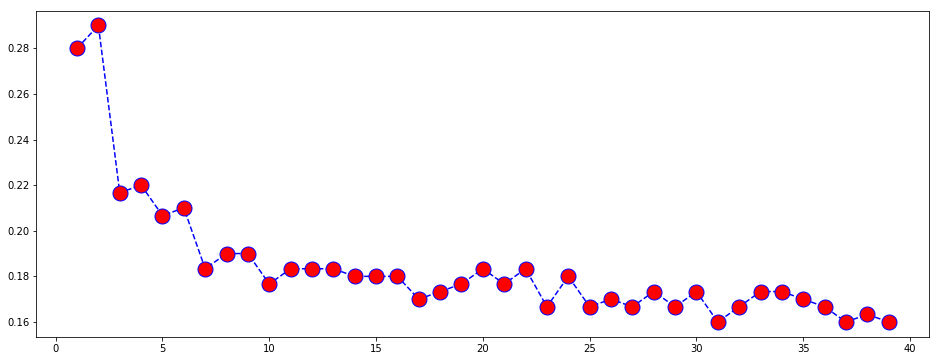

In [40]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, ls = "--", c = "b", marker = "o", mfc = "r", ms = 15)

## we will repeat the modeling with the new K value of 31. We see a significant perfoemance in our model precision

In [41]:
kk = KNeighborsClassifier(n_neighbors=31)
kk.fit(X_train,y_train)
pre = kk.predict(X_test)
print(classification_report(y_test, pre))
print(confusion_matrix(y_test, pre))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

[[123  29]
 [ 19 129]]
